In [1]:
import pandas as pd

In [4]:
data_path = r"C:\Users\reshw_5xgc48s\Downloads\data_employee.csv"


In [3]:
df = pd.read_csv(data_path)

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
import pandas as pd  

data_path = r"C:\Users\reshw_5xgc48s\Downloads\data_employee.csv"
df = pd.read_csv(data_path)
print(df.shape) 


(48842, 15)


In [ ]:
df = pd.read_csv(data_path)
print(df.isna().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [6]:
print(df['workclass'].value_counts())


workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [7]:
df['workclass'].replace({'?': 'Others'}, inplace=True)
print(df['workclass'].value_counts())


workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


C:\Users\reshw_5xgc48s\AppData\Local\Temp\ipykernel_31348\1252752798.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].replace({'?': 'Others'}, inplace=True)


In [8]:
print(df['occupation'].value_counts())


occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [9]:
df['occupation'].replace({'?': 'Others'}, inplace=True)
print(df['occupation'].value_counts())


occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


C:\Users\reshw_5xgc48s\AppData\Local\Temp\ipykernel_31348\4139428558.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['occupation'].replace({'?': 'Others'}, inplace=True)


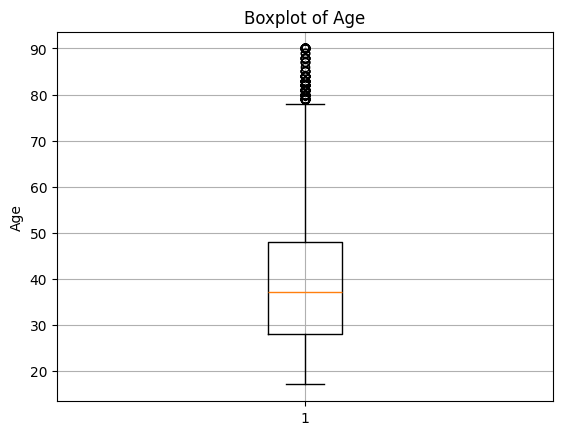

In [10]:
import matplotlib.pyplot as plt  # Visualization

plt.boxplot(df['age'])
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.grid(True)
plt.show()


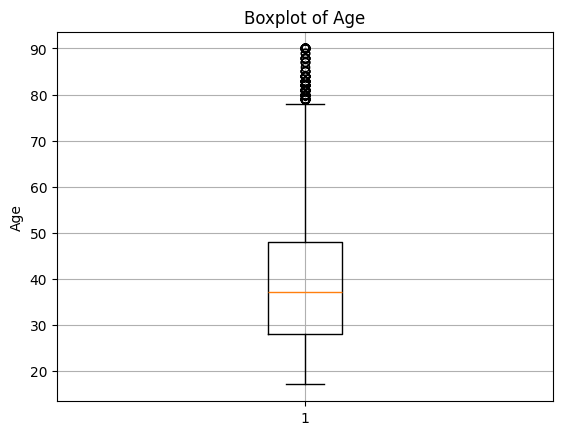

In [12]:
import matplotlib.pyplot as plt

plt.boxplot(df['age'])
plt.title("Boxplot of Age")
plt.ylabel("Age")
plt.grid(True)
plt.show()


In [ ]:
plt.boxplot(df['capital-gain'])
plt.title("Boxplot of Capital Gain")
plt.ylabel("Capital Gain")
plt.grid(True)
plt.show()


In [ ]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import joblib

# ✅ Load the dataset (using raw string for Windows file path)
df = pd.read_csv(r"C:\Users\reshw_5xgc48s\Downloads\data_employee.csv")

# ✅ Create "experience" as (age - 18)
df['experience'] = df['age'] - 18

# ✅ Keep only the relevant features used in the Streamlit app
df = df[['age', 'education', 'occupation', 'hours-per-week', 'experience', 'income']]

# ✅ Clean missing or unknown values
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)

# ✅ Define features and target
X = df.drop('income', axis=1)
y = df['income']

# ✅ Normalize target values
y = y.apply(lambda x: ">50K" if x.strip() == ">50K" else "<=50K")

# ✅ Preprocessing for categorical columns
categorical_features = ['education', 'occupation']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# ✅ Build preprocessing and model pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # pass through age, hours-per-week, experience
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# ✅ Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Train the model
model.fit(X_train, y_train)

# ✅ Evaluate the model (optional)
print("Training Accuracy:", model.score(X_train, y_train))
print("Testing Accuracy:", model.score(X_test, y_test))

# ✅ Save the trained model
joblib.dump(model, "best_model.pkl")
print("✅ Model saved as best_model.pkl")


Training Accuracy: 0.8866018573833705
Testing Accuracy: 0.7680026067122842
✅ Model saved as best_model.pkl


In [8]:
print("\nClass Distribution in Training Data:")
print(y.value_counts(normalize=True))



Class Distribution in Training Data:
income
<=50K    0.751874
>50K     0.248126
Name: proportion, dtype: float64


In [9]:
# Combine X and y for resampling
df_balanced = X.copy()
df_balanced['income'] = y

# Separate majority and minority classes
majority = df_balanced[df_balanced.income == '<=50K']
minority = df_balanced[df_balanced.income == '>50K']

# Upsample the minority class
from sklearn.utils import resample
minority_upsampled = resample(
    minority,
    replace=True,                # Sample with replacement
    n_samples=len(majority),     # Match majority class
    random_state=42
)

# Combine into a new balanced dataset
df_resampled = pd.concat([majority, minority_upsampled])

# Redefine X and y
X = df_resampled.drop('income', axis=1)
y = df_resampled['income']


In [10]:
# Employee Salary Classification - Model Training with Class Balancing

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
import joblib

# ✅ Load the dataset
df = pd.read_csv(r"C:\Users\reshw_5xgc48s\Downloads\data_employee.csv")

# ✅ Create "experience" as (age - 18)
df['experience'] = df['age'] - 18

# ✅ Keep only the features used in app.py
df = df[['age', 'education', 'occupation', 'hours-per-week', 'experience', 'income']]

# ✅ Clean missing or unknown values
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)

# ✅ Define features and target
X = df.drop('income', axis=1)
y = df['income'].apply(lambda x: ">50K" if x.strip() == ">50K" else "<=50K")

# ✅ Print class distribution before balancing
print("\nClass Distribution in Original Data:")
print(y.value_counts(normalize=True))

# ✅ Balance the dataset by upsampling the minority class
df_balanced = X.copy()
df_balanced['income'] = y

majority = df_balanced[df_balanced.income == '<=50K']
minority = df_balanced[df_balanced.income == '>50K']

minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=42)

df_resampled = pd.concat([majority, minority_upsampled])

# ✅ Define final X and y
X = df_resampled.drop('income', axis=1)
y = df_resampled['income']

# ✅ Print new class distribution
print("\nClass Distribution After Balancing:")
print(y.value_counts(normalize=True))

# ✅ Preprocessing for categorical columns
categorical_features = ['education', 'occupation']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# ✅ Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# ✅ Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Train the model
model.fit(X_train, y_train)

# ✅ Evaluate
print("\nTraining Accuracy:", model.score(X_train, y_train))
print("Testing Accuracy:", model.score(X_test, y_test))

# ✅ Save the model
joblib.dump(model, "best_model.pkl")
print("\n✅ Model saved as best_model.pkl")



Class Distribution in Original Data:
income
<=50K    0.751874
>50K     0.248126
Name: proportion, dtype: float64

Class Distribution After Balancing:
income
<=50K    0.5
>50K     0.5
Name: proportion, dtype: float64

Training Accuracy: 0.8701627029272081
Testing Accuracy: 0.8118454315637414

✅ Model saved as best_model.pkl
